# Desafío - Pruebas de hipótesis

### Desafío 1: Evaluar juicios de hipótesis

A continuación se presenta una serie de enunciados de hipótesis. Usted debe discernir si es posible rechazar la hipótesis nula.

1.   75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era medir actitudes frente a la adopción homoparentales. La organización encargada de procesar los datos obtuvo los siguientes resultados:
    * El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identifaron como homosexuales se mostraron a favor de la adopción homoparental.
    * Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.
    * Con un valor de prueba `p = 0.1183` y un puntaje de corte de `z = 2.59`, ¿qué se debe concluir? 
    
2. Un investigador de la Sociedad de Abstemios de Chile sugiere que los hombres tienen mayores niveles de consumo de alcohol que las mujeres, siendo esta diferencia estadísticamente significativa. Esto en base a su estudio realizado con 48 individuos, donde contrastó su puntaje de prueba a una distribución asintóticamente normal. ¿Qué se puede decir sobre su estudio?.


1. el nivel de significación es de 99%, por lo que el valor de prueba p se compararía con 0.01. En este caso es mayor, por lo que se falla en rechazar la hipotesis nula: ambos porcentajes no son diferentes.

2. Como solo hay 48 personas, es más fácil aprobar la hipótesis nula. Falta indicar el nivel de significancia porque podría ser cambiado hasta aprobar cualquier hipótesis.

### Desafío 2: Importe la base de datos utilizada la sesión presencial anterior
* Agrege una serie de variables binarias por cada continente de la variable region.

*tip:* Utilice `np.where` o `pd.get_dummies` para ello.

* De manera similar a la sesión anterior, enfóquese en las siguientes variables:
    * Apellidos desde la A hasta la N: Enfocarse en las variables `chldmort`, `adfert` y `life`.
    * Apellidos desde la N hasta la Z: Enfocarse en las variables `femlab` , `literacy` y `school`.

In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn') 
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.dpi"] = 200 

In [2]:
df = pd.read_csv('nations.csv', encoding='latin1').drop(columns="Unnamed: 0")
df.head()

country  region           gdp    school      adfert  chldmort  \
0       Algeria  Africa   7300.399902  6.716667    7.300000     34.75   
1         Benin  Africa   1338.800049  3.100000  111.699997    122.75   
2      Botswana  Africa  12307.400391  8.600000   52.099998     60.25   
3  Burkina Faso  Africa   1063.400024  1.300000  124.800003    170.50   
4       Burundi  Africa    349.200012  2.483333   18.600000    168.50   

        life       pop      urban  femlab   literacy   co2       gini  
0  72.316666  34172236  64.933334  0.4522  72.599998  15.0        NaN  
1  54.733334   8237634  41.000000  0.8482  41.700001   1.2        NaN  
2  52.250000   1941233  59.250000  0.8870  84.099998   9.2        NaN  
3  53.783333  15308383  23.583334  0.8584  23.600000   0.2        NaN  
4  48.866665   7821783  10.250000  1.0344  66.599998   0.1  33.299999

In [3]:
df['region'].unique()

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

In [4]:
df_bin = pd.get_dummies(df, prefix='bin', prefix_sep='_', dummy_na=True, columns=['region'])
df_bin

country           gdp     school      adfert  chldmort  \
0            Algeria   7300.399902   6.716667    7.300000     34.75   
1              Benin   1338.800049   3.100000  111.699997    122.75   
2           Botswana  12307.400391   8.600000   52.099998     60.25   
3       Burkina Faso   1063.400024   1.300000  124.800003    170.50   
4            Burundi    349.200012   2.483333   18.600000    168.50   
..               ...           ...        ...         ...       ...   
189            Samoa   4012.600098  10.300000   28.299999     26.75   
190  Solomon Islands   2249.199951   4.500000   70.300003     36.00   
191            Tonga   4072.199951  10.133333   22.299999     19.25   
192           Tuvalu           NaN        NaN   23.299999     36.50   
193          Vanuatu   3809.800049   6.700000   54.000000     17.75   

          life       pop      urban  femlab   literacy    co2       gini  \
0    72.316666  34172236  64.933334  0.4522  72.599998  15.00        NaN   
1    54.733334   8237634  41.000000  0.8482  41.700001   1.20        NaN   
2    52.250000   1941233  59.250000  0.8870  84.099998   9.20        NaN   
3    53.783333  15308383  23.583334  0.8584  23.600000   0.20        NaN   
4    48.866665   7821783  10.250000  1.0344  66.599998   0.10  33.299999   
..         ...       ...        ...     ...        ...    ...        ...   
189  71.533333    181600  20.666668  0.5010  98.800003   3.10        NaN   
190  66.500000    503617  17.766666  0.4858        NaN   1.40        NaN   
191  71.833336    102550  23.266666  0.7150  99.000000   4.85        NaN   
192  66.033333      9767  49.233334     NaN        NaN    NaN        NaN   
193  69.966667    225317  24.500000  0.8988  82.000000   1.50        NaN   

     bin_Africa  bin_Americas  bin_Asia  bin_Europe  bin_Oceania  bin_nan  
0             1             0         0           0            0        0  
1             1             0         0           0            0        0  
2             1             0         0           0            0        0  
3             1             0         0           0            0        0  
4             1             0         0           0            0        0  
..          ...           ...       ...         ...          ...      ...  
189           0             0         0           0            1        0  
190           0             0         0           0            1        0  
191           0             0         0           0            1        0  
192           0             0         0           0            1        0  
193           0             0         0           0            1        0  

[194 rows x 18 columns]

In [5]:
def plot_vline_mean(x, **kwargs):
    data = kwargs.pop("data") 
    xval = np.mean(data[x])
    plt.axvline(xval)

def histograma_bin(dataframe, variable, binarize):
    tmp = dataframe.copy()
    tmp = tmp[[variable, binarize]].dropna()
    
    g = sns.FacetGrid(tmp, col=binarize, sharex=True, sharey=True, height=5, aspect=1)
    g.map(sns.distplot, variable, hist=True, kde=False, bins='auto', color='grey', axlabel=False)
    g.map_dataframe(plot_vline_mean, variable)
    g.axes[0,0].set_title( "{} paises de {}".format(variable, binarize[4:]) )
    g.axes[0,1].set_title( "{} paises no de {}".format(variable, binarize[4:]) )

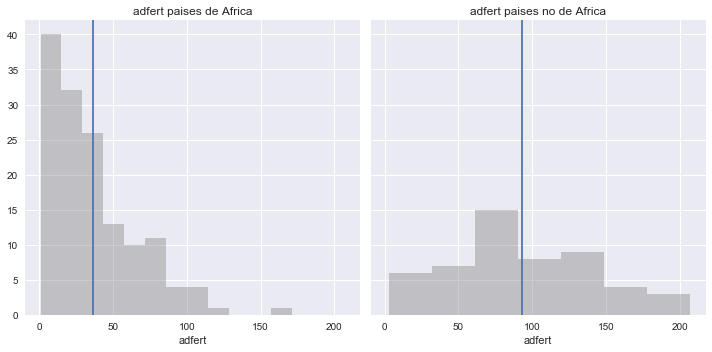

In [6]:
histograma_bin(df_bin, 'adfert', 'bin_Africa')

In [7]:
regiones_bin = 'bin_' + df['region'].unique()
regiones_bin

array(['bin_Africa', 'bin_Americas', 'bin_Asia', 'bin_Europe',
       'bin_Oceania'], dtype=object)

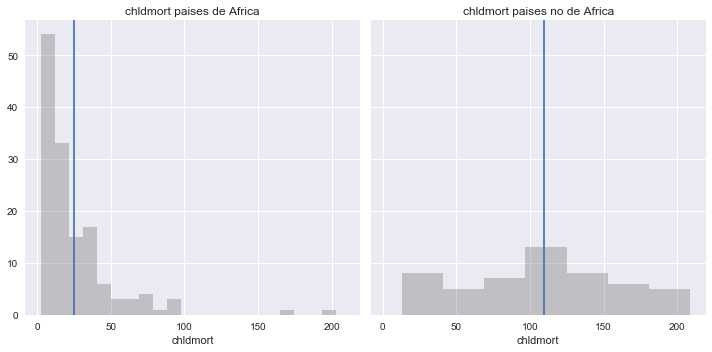

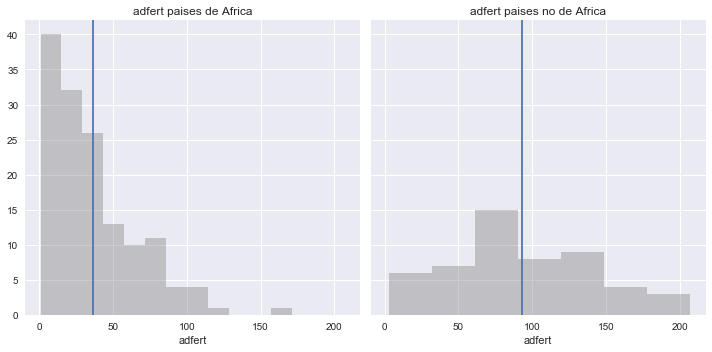

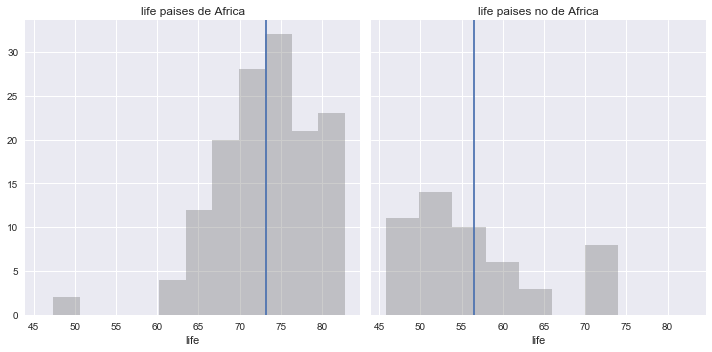

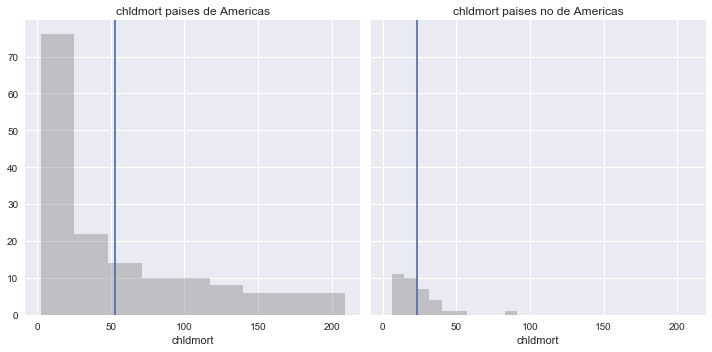

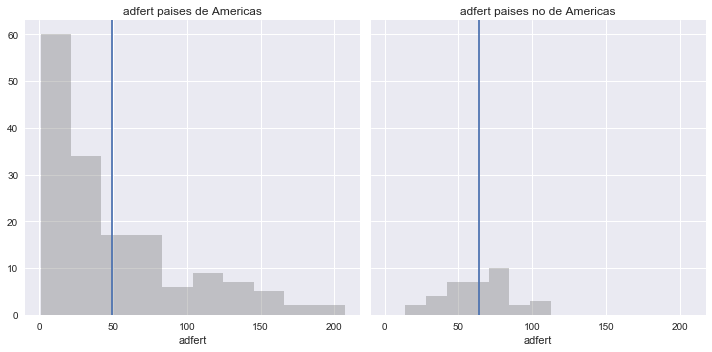

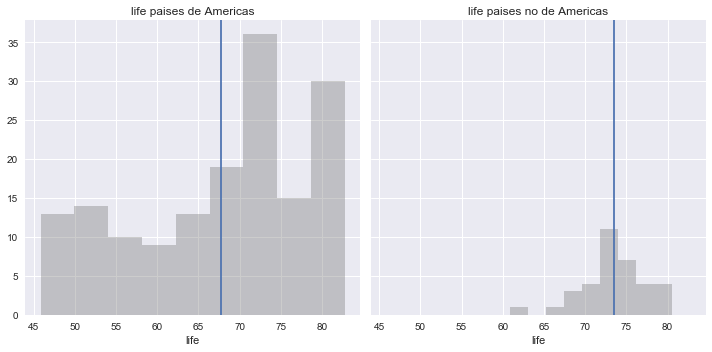

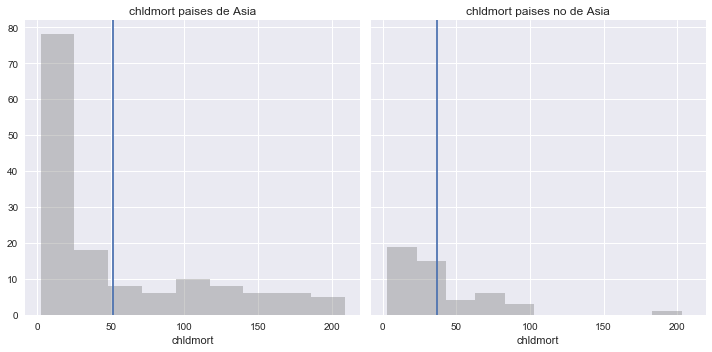

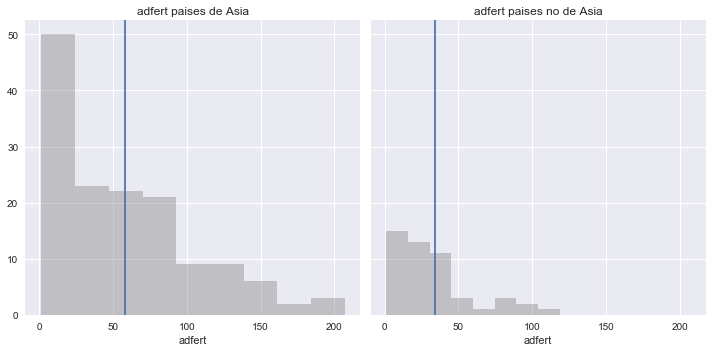

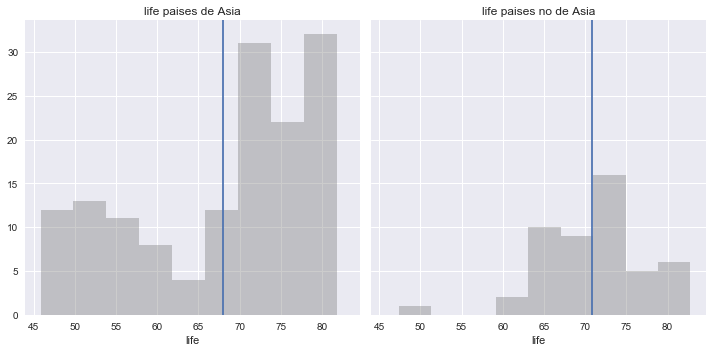

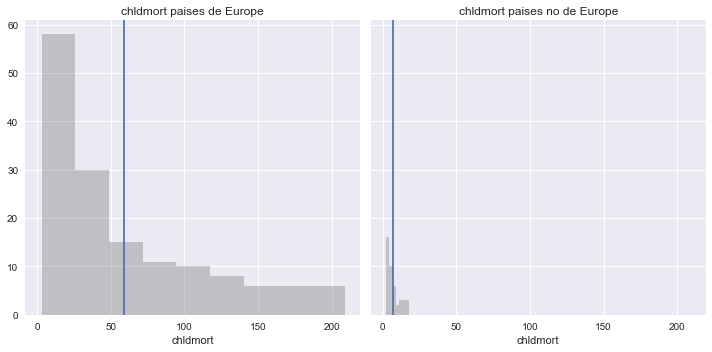

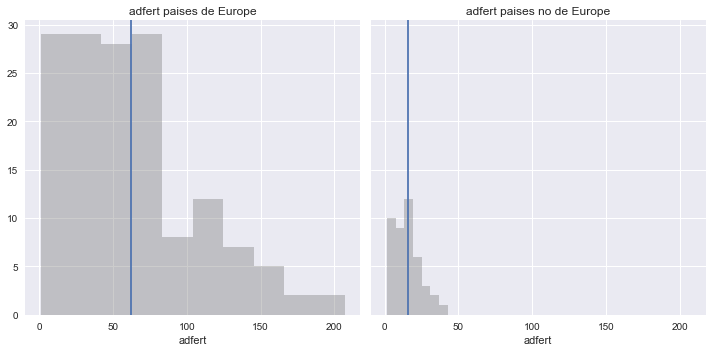

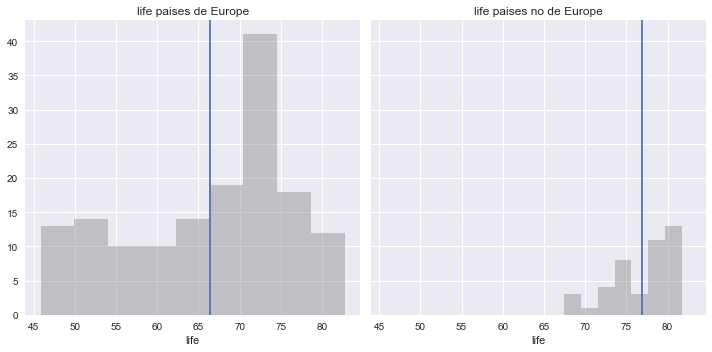

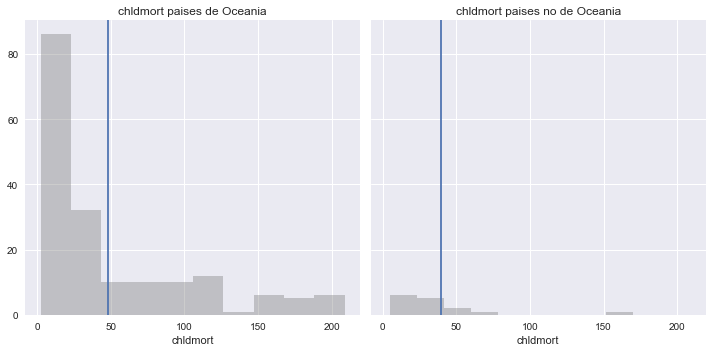

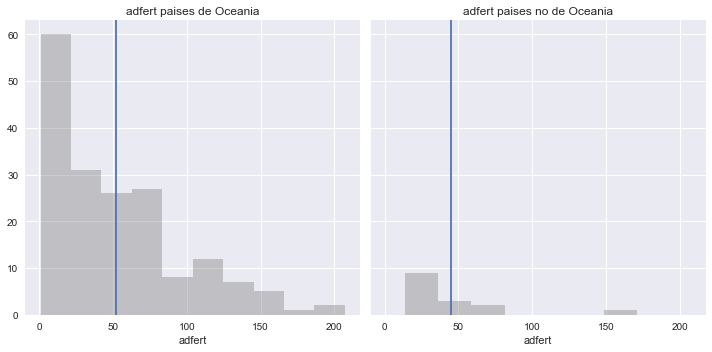

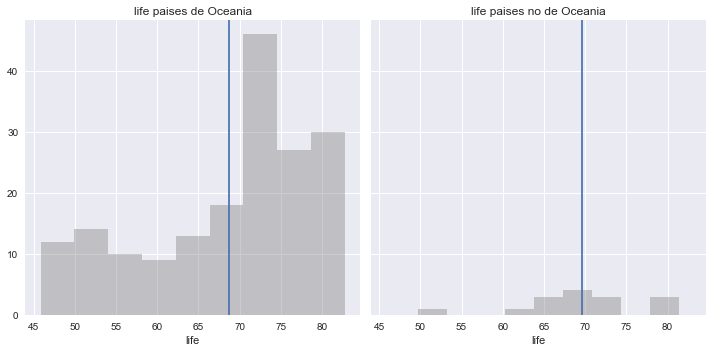

In [8]:
for bin in regiones_bin:
    for var in ['chldmort', 'adfert', 'life']:
        histograma_bin(df_bin, var, bin)

### Desafío 3: Implemente una función de prueba de hipótesis a mano
* La función debe ingresar los siguientes argumentos:
    * `df` : La tabla de datos.
    * `variable` : La variable a analizar.
    * `binarize` : El indicador binario a utilizar.
* *tips:*
    * Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con dropna() .
    * Implemente `ttest_ind` de `scipy.stats` y guarde el valor `t` y `pval`.
    * Reporte las medias para cada grupo (0 y 1).
    * Reporte la diferencia de entre las medias.
    * Reporte los valores `t` y `p`.
    
*Nota: Use 4 cifras significativas*

In [9]:
def prueba_hipotesis(df, variable, binarize):
    tmp = df.copy()
    bin_0 = tmp[tmp[binarize] == 0][variable].dropna()
    bin_1 = tmp[tmp[binarize] == 1][variable].dropna()
    t, pval = stats.ttest_ind(bin_0, bin_1)
    print('La media de {} en el mundo es {}'.format(variable, bin_0.mean()) )
    print('La media de {} en {} es {}'.format(variable, binarize[4:], bin_1.mean()) )
    print('La diferencia entre las medias es', abs(bin_0.mean() - bin_1.mean()) )
    print('Al comparar las medias, el valor t es {0:.4f} y el p value es: {1:.4f}'.format(t, pval))
    if pval < 0.01:
        print('Rechazamos la hipótesis nula de igualdad de media con un 99%')
    elif pval < 0.05:
        print('Rechazamos la hipótesis nula de igualdad de media con un 95%')
    elif pval < 0.1:
        print('Rechazamos la hipótesis nula de igualdad de media con un 90%')
    else:
        print('Aceptamos la hipótesis nula de igualdad de media con un 90%')
    

In [10]:
prueba_hipotesis(df_bin, 'chldmort', 'bin_Africa')

La media de chldmort en el mundo es 24.74822695035461
La media de chldmort en Africa es 109.75
La diferencia entre las medias es 85.0017730496454
Al comparar las medias, el valor t es -14.1737 y el p value es: 0.0000
Rechazamos la hipótesis nula de igualdad de media con un 99%


### Desafío 4: Implemente una función que grafique los histogramas para ambas muestras.
* Genere una función que devuelva un gráfico donde visualice las dos histogramas cuando la variable es 1 y 0, respectivamente.
    * *tips:* Refactorize la función incluyendo el método `hist` de `matplotlib.pyplot`. Incluya los argumentos `alpha` y `label`.
* Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y posteriormente grafique. Concluya con los principales resultados al respecto.

In [11]:
def histograma_doble_super(dataframe, variable, var_binaria):
    tmp = dataframe.copy()
    hist_0 = tmp[tmp[var_binaria] == 0][variable].dropna()
    hist_1 = tmp[tmp[var_binaria] == 1][variable].dropna()
    
    prueba_hipotesis(dataframe, variable, var_binaria)
    
    label = variable + ' paises no de ' + var_binaria[4:]
    sns.distplot(hist_0, hist=True, kde=False, 
             bins='auto', color='blue', axlabel=False,
             hist_kws={'alpha': .7, 'label': label})
    plt.axvline(np.mean(hist_0), color='blue')

    label = variable + ' paises de ' + var_binaria[4:]
    sns.distplot(hist_1, hist=True, kde=False, 
             bins='auto', color='red', axlabel=False,
             hist_kws={'alpha': .7, 'label': label})
    plt.axvline(np.mean(hist_1), color='red')
    
    plt.legend()
    plt.show()

Africa - chldmort
La media de chldmort en el mundo es 24.74822695035461
La media de chldmort en Africa es 109.75
La diferencia entre las medias es 85.0017730496454
Al comparar las medias, el valor t es -14.1737 y el p value es: 0.0000
Rechazamos la hipótesis nula de igualdad de media con un 99%


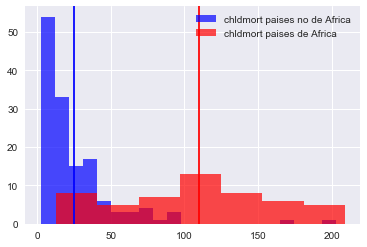

Africa - adfert
La media de adfert en el mundo es 36.83450711361119
La media de adfert en Africa es 92.72115342892133
La diferencia entre las medias es 55.88664631531014
Al comparar las medias, el valor t es -9.4444 y el p value es: 0.0000
Rechazamos la hipótesis nula de igualdad de media con un 99%


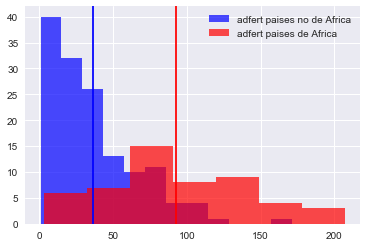

Africa - life
La media de life en el mundo es 73.21114999475614
La media de life en Africa es 56.49038454202504
La diferencia entre las medias es 16.7207654527311
Al comparar las medias, el valor t es 15.1746 y el p value es: 0.0000
Rechazamos la hipótesis nula de igualdad de media con un 99%


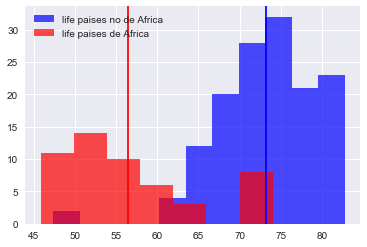

Americas - chldmort
La media de chldmort en el mundo es 53.052215189873415
La media de chldmort en Americas es 23.264285714285716
La diferencia entre las medias es 29.7879294755877
Al comparar las medias, el valor t es 3.0856 y el p value es: 0.0023
Rechazamos la hipótesis nula de igualdad de media con un 99%


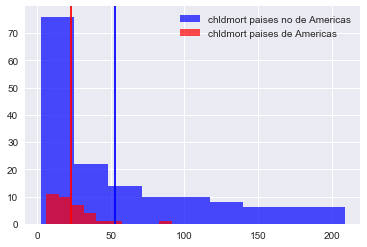

Americas - adfert
La media de adfert en el mundo es 49.20691819985708
La media de adfert en Americas es 63.659999847412095
La diferencia entre las medias es 14.453081647555017
Al comparar las medias, el valor t es -1.7663 y el p value es: 0.0789
Rechazamos la hipótesis nula de igualdad de media con un 90%


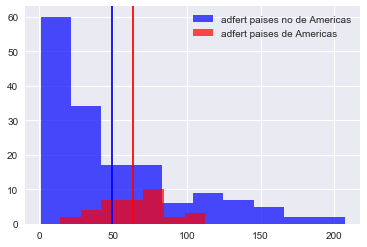

Americas - life
La media de life en el mundo es 67.68983217155409
La media de life en Americas es 73.45142800467355
La diferencia entre las medias es 5.761595833119458
Al comparar las medias, el valor t es -3.1384 y el p value es: 0.0020
Rechazamos la hipótesis nula de igualdad de media con un 99%


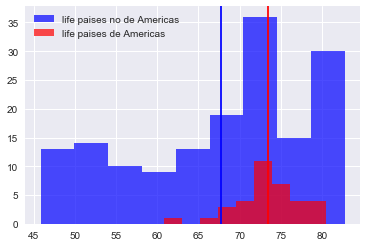

Asia - chldmort
La media de chldmort en el mundo es 51.141379310344824
La media de chldmort en Asia es 37.104166666666664
La diferencia entre las medias es 14.03721264367816
Al comparar las medias, el valor t es 1.6027 y el p value es: 0.1106
Aceptamos la hipótesis nula de igualdad de media con un 90%


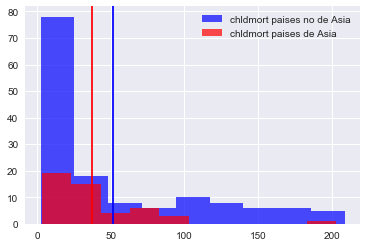

Asia - adfert
La media de adfert en el mundo es 57.87999988671007
La media de adfert en Asia es 33.86530622170896
La diferencia entre las medias es 24.014693665001104
Al comparar las medias, el valor t es 3.3863 y el p value es: 0.0009
Rechazamos la hipótesis nula de igualdad de media con un 99%


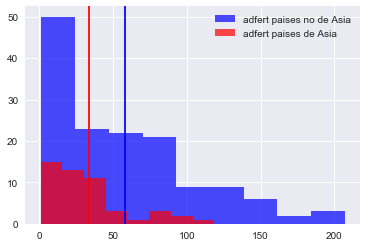

Asia - life
La media de life en el mundo es 68.0050572625522
La media de life en Asia es 70.87244882388991
La diferencia entre las medias es 2.867391561337712
Al comparar las medias, el valor t es -1.7347 y el p value es: 0.0844
Rechazamos la hipótesis nula de igualdad de media con un 90%


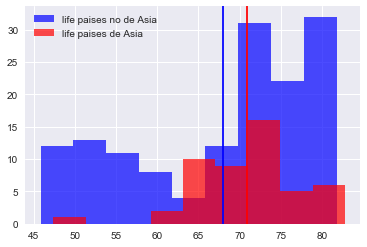

Europe - chldmort
La media de chldmort en el mundo es 59.29
La media de chldmort en Europe es 7.046511627906977
La diferencia entre las medias es 52.243488372093026
Al comparar las medias, el valor t es 6.2624 y el p value es: 0.0000
Rechazamos la hipótesis nula de igualdad de media con un 99%


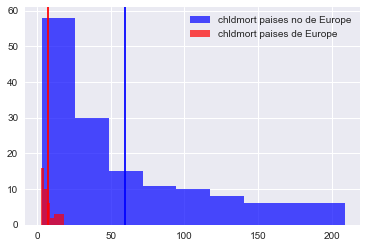

Europe - adfert
La media de adfert en el mundo es 62.14503303268887
La media de adfert en Europe es 15.53720931396928
La diferencia entre las medias es 46.607823718719594
Al comparar las medias, el valor t es 6.7980 y el p value es: 0.0000
Rechazamos la hipótesis nula de igualdad de media con un 99%


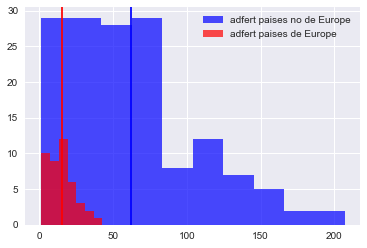

Europe - life
La media de life en el mundo es 66.38951416520882
La media de life en Europe es 76.94573619753815
La diferencia entre las medias es 10.55622203232933
Al comparar las medias, el valor t es -6.7354 y el p value es: 0.0000
Rechazamos la hipótesis nula de igualdad de media con un 99%


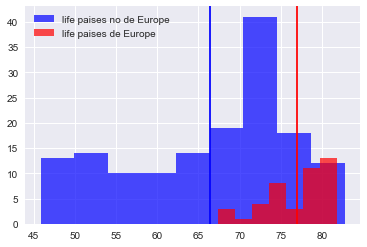

Oceania - chldmort
La media de chldmort en el mundo es 48.34410112359551
La media de chldmort en Oceania es 39.416666666666664
La diferencia entre las medias es 8.927434456928843
Al comparar las medias, el valor t es 0.6278 y el p value es: 0.5309
Aceptamos la hipótesis nula de igualdad de media con un 90%


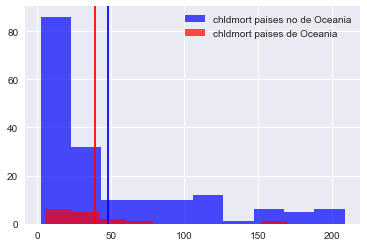

Oceania - adfert
La media de adfert en el mundo es 52.38603339847906
La media de adfert en Oceania es 44.99333400726322
La diferencia entre las medias es 7.392699391215835
Al comparar las medias, el valor t es 0.6231 y el p value es: 0.5339
Aceptamos la hipótesis nula de igualdad de media con un 90%


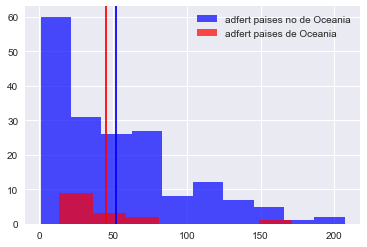

Oceania - life
La media de life en el mundo es 68.65763477772973
La media de life en Oceania es 69.58444468180339
La diferencia entre las medias es 0.9268099040736644
Al comparar las medias, el valor t es -0.3421 y el p value es: 0.7326
Aceptamos la hipótesis nula de igualdad de media con un 90%


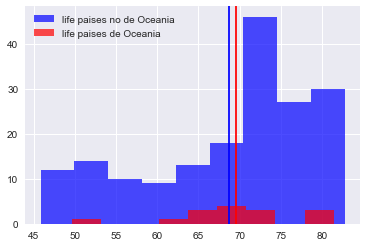

In [12]:
regiones_bin = 'bin_' + df['region'].unique()
variables = ['chldmort', 'adfert', 'life']
for bin in regiones_bin:
    for var in variables:
        print(bin[4:], '-', var)
        histograma_doble_super(df_bin, var, bin)

**Respuesta:**  
Para las siguientes combinaciones de región y variable, se acepta la hipótesis nula de igualdad de media.
* Americas - adfert
* Asia - chldmort
* Asia - life
* Oceania - chldmort
* Oceania - adfert
* Oceania - life